In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
pathmentalhealthtech = '../data/mental_health_and_technology_usage_2024.csv'
df = pd.read_csv(pathmentalhealthtech)

print("=== SCREEN TIME AND MENTAL HEALTH ANALYSIS ===\n")
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

# ============================================================================
# DATA PREPROCESSING
# ============================================================================

print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Handle categorical variables - create numerical mappings
print("\nUnique values in categorical columns:")
categorical_cols = ['Gender', 'Mental_Health_Status', 'Stress_Level', 'Support_Systems_Access', 
                   'Work_Environment_Impact', 'Online_Support_Usage']

for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")

# Create numerical mappings for analysis
# Mental Health Status mapping
mental_health_mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
df['Mental_Health_Numeric'] = df['Mental_Health_Status'].map(mental_health_mapping)

# Stress Level mapping
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Level_Numeric'] = df['Stress_Level'].map(stress_mapping)

# Binary mappings
df['Support_Systems_Numeric'] = df['Support_Systems_Access'].map({'No': 0, 'Yes': 1})
df['Online_Support_Numeric'] = df['Online_Support_Usage'].map({'No': 0, 'Yes': 1})
df['Work_Impact_Negative'] = df['Work_Environment_Impact'].map({'Positive': 0, 'Neutral': 0, 'Negative': 1})

# Age groups for analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 100], 
                        labels=['18-25', '26-35', '36-45', '46+'])

print("\nPreprocessing completed!")
print(f"\nAge Group Distribution:")
print(df['Age_Group'].value_counts())
print(f"\nGender Distribution:")
print(df['Gender'].value_counts())

# ============================================================================
# CORRELATION ANALYSIS
# ============================================================================

print("\n" + "="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Select relevant columns for correlation
corr_cols = ['Screen_Time_Hours', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 
             'Gaming_Hours', 'Sleep_Hours', 'Physical_Activity_Hours',
             'Mental_Health_Numeric', 'Stress_Level_Numeric']

correlation_matrix = df[corr_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix.round(3))

# ============================================================================
# CLUSTERING ANALYSIS
# ============================================================================

print("\n" + "="*60)
print("CLUSTERING ANALYSIS")
print("="*60)

# Prepare data for clustering
clustering_features = ['Screen_Time_Hours', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 
                      'Gaming_Hours', 'Sleep_Hours', 'Physical_Activity_Hours',
                      'Mental_Health_Numeric', 'Stress_Level_Numeric', 'Age']

# Remove any missing values for clustering
df_cluster = df[clustering_features].dropna()

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Find optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Find optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.3f}")

# Perform final clustering
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df_cluster['Cluster'] = cluster_labels

# Analyze clusters
print(f"\nCluster Distribution:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} people ({count/len(cluster_labels)*100:.1f}%)")

# ============================================================================
# GENDER AND AGE ANALYSIS
# ============================================================================

print("\n" + "="*60)
print("GENDER AND AGE ANALYSIS")
print("="*60)

# Gender-based analysis
print("\n--- GENDER COMPARISON ---")
gender_summary = df.groupby('Gender').agg({
    'Screen_Time_Hours': ['mean', 'std'],
    'Mental_Health_Numeric': 'mean',
    'Stress_Level_Numeric': 'mean',
    'Sleep_Hours': 'mean',
    'Social_Media_Usage_Hours': 'mean',
    'Technology_Usage_Hours': 'mean'
}).round(2)

print("Average metrics by gender:")
print(gender_summary)

# Age group analysis
print("\n--- AGE GROUP COMPARISON ---")
age_summary = df.groupby('Age_Group').agg({
    'Screen_Time_Hours': ['mean', 'std'],
    'Mental_Health_Numeric': 'mean',
    'Stress_Level_Numeric': 'mean',
    'Sleep_Hours': 'mean',
    'Social_Media_Usage_Hours': 'mean',
    'Technology_Usage_Hours': 'mean'
}).round(2)

print("Average metrics by age group:")
print(age_summary)


=== SCREEN TIME AND MENTAL HEALTH ANALYSIS ===

Dataset Overview:
Shape: (10000, 14)
Columns: ['User_ID', 'Age', 'Gender', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours', 'Screen_Time_Hours', 'Mental_Health_Status', 'Stress_Level', 'Sleep_Hours', 'Physical_Activity_Hours', 'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage']

First few rows:
      User_ID  Age  Gender  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0  USER-00001   23  Female                    6.57                      6.00   
1  USER-00002   21    Male                    3.01                      2.57   
2  USER-00003   51    Male                    3.04                      6.14   
3  USER-00004   25  Female                    3.84                      4.48   
4  USER-00005   53    Male                    1.20                      0.56   

   Gaming_Hours  Screen_Time_Hours Mental_Health_Status Stress_Level  \
0          0.68              12.36                 Good  


CREATING ENHANCED VISUALIZATIONS


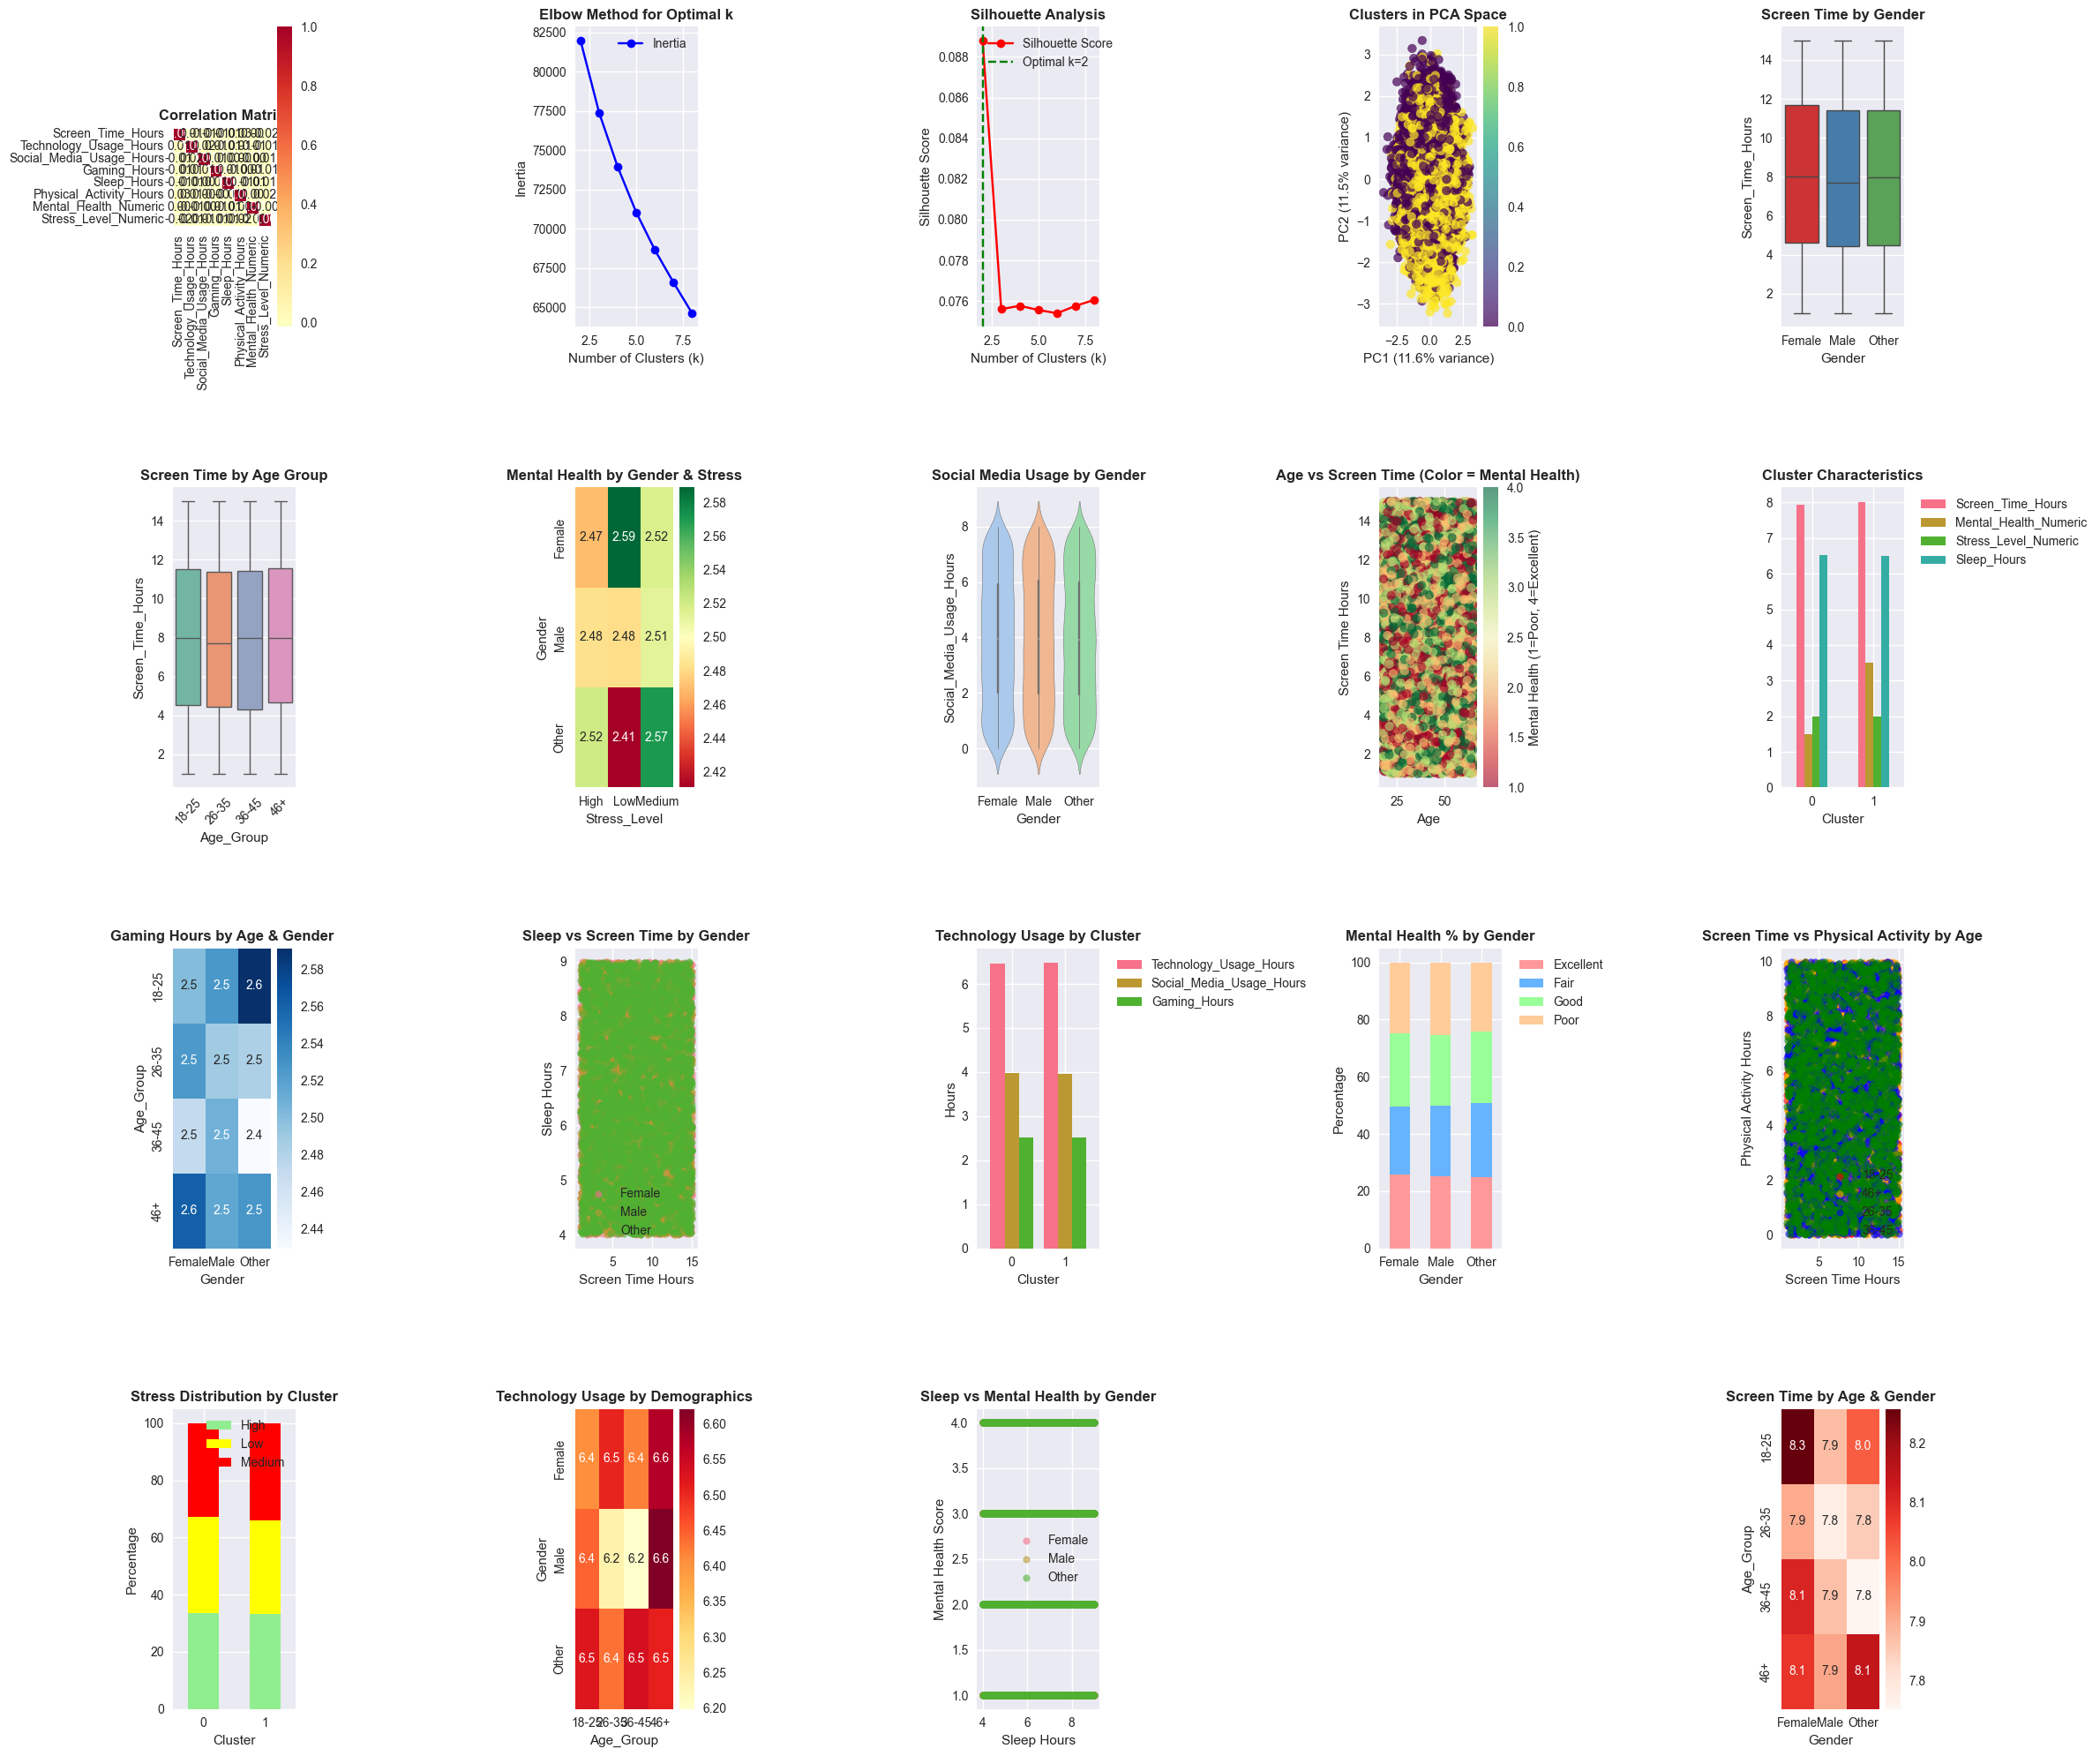

In [7]:

# ============================================================================
# ENHANCED VISUALIZATIONS WITH DEMOGRAPHICS
# ============================================================================

print("\n" + "="*60)
print("CREATING ENHANCED VISUALIZATIONS")
print("="*60)

# Create comprehensive visualization with demographics and clustering
fig = plt.figure(figsize=(24, 20))

# 1. Correlation Heatmap (keep original)
plt.subplot(4, 5, 1)
corr_cols = ['Screen_Time_Hours', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 
             'Gaming_Hours', 'Sleep_Hours', 'Physical_Activity_Hours',
             'Mental_Health_Numeric', 'Stress_Level_Numeric']
correlation_matrix = df[corr_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix', fontsize=12, fontweight='bold')

# 2. Clustering Elbow Method
plt.subplot(4, 5, 2)
plt.plot(k_range, inertias, 'bo-', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k', fontsize=12, fontweight='bold')
plt.legend()

# 3. Silhouette Scores
plt.subplot(4, 5, 3)
plt.plot(k_range, silhouette_scores, 'ro-', label='Silhouette Score')
plt.axvline(x=optimal_k, color='green', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis', fontsize=12, fontweight='bold')
plt.legend()

# 4. Cluster Visualization (PCA)
plt.subplot(4, 5, 4)
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled)
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Clusters in PCA Space', fontsize=12, fontweight='bold')
plt.colorbar(scatter)

# 5. Screen Time by Gender
plt.subplot(4, 5, 5)
sns.boxplot(data=df, x='Gender', y='Screen_Time_Hours', palette='Set1')
plt.title('Screen Time by Gender', fontsize=12, fontweight='bold')

# 6. Screen Time by Age Group
plt.subplot(4, 5, 6)
sns.boxplot(data=df, x='Age_Group', y='Screen_Time_Hours', palette='Set2')
plt.title('Screen Time by Age Group', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

# 7. Mental Health by Gender and Stress
plt.subplot(4, 5, 7)
mental_gender_stress = df.groupby(['Gender', 'Stress_Level'])['Mental_Health_Numeric'].mean().unstack()
sns.heatmap(mental_gender_stress, annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Mental Health by Gender & Stress', fontsize=12, fontweight='bold')

# 8. Social Media Usage by Gender
plt.subplot(4, 5, 8)
sns.violinplot(data=df, x='Gender', y='Social_Media_Usage_Hours', palette='pastel')
plt.title('Social Media Usage by Gender', fontsize=12, fontweight='bold')

# 9. Age vs Screen Time with Mental Health coloring
plt.subplot(4, 5, 9)
scatter = plt.scatter(df['Age'], df['Screen_Time_Hours'], 
                     c=df['Mental_Health_Numeric'], cmap='RdYlGn', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Screen Time Hours')
plt.title('Age vs Screen Time (Color = Mental Health)', fontsize=12, fontweight='bold')
plt.colorbar(scatter, label='Mental Health (1=Poor, 4=Excellent)')

# 10. Cluster Characteristics
plt.subplot(4, 5, 10)
cluster_means = df_cluster.groupby('Cluster')[['Screen_Time_Hours', 'Mental_Health_Numeric', 
                                              'Stress_Level_Numeric', 'Sleep_Hours']].mean()
cluster_means.plot(kind='bar', ax=plt.gca())
plt.title('Cluster Characteristics', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 11. Gaming Hours by Gender and Age
plt.subplot(4, 5, 11)
gaming_pivot = df.pivot_table(values='Gaming_Hours', index='Age_Group', columns='Gender', aggfunc='mean')
sns.heatmap(gaming_pivot, annot=True, fmt='.1f', cmap='Blues')
plt.title('Gaming Hours by Age & Gender', fontsize=12, fontweight='bold')

# 12. Sleep Quality by Demographics
plt.subplot(4, 5, 12)
for gender in df['Gender'].unique():
    gender_data = df[df['Gender'] == gender]
    plt.scatter(gender_data['Screen_Time_Hours'], gender_data['Sleep_Hours'], 
               alpha=0.6, label=gender, s=30)
plt.xlabel('Screen Time Hours')
plt.ylabel('Sleep Hours')
plt.title('Sleep vs Screen Time by Gender', fontsize=12, fontweight='bold')
plt.legend()

# 13. Technology Usage Distribution by Cluster
plt.subplot(4, 5, 13)
tech_by_cluster = df_cluster.groupby('Cluster')[['Technology_Usage_Hours', 'Social_Media_Usage_Hours', 
                                                'Gaming_Hours']].mean()
tech_by_cluster.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Technology Usage by Cluster', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Hours')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 14. Mental Health Distribution by Gender
plt.subplot(4, 5, 14)
mental_health_gender = pd.crosstab(df['Gender'], df['Mental_Health_Status'], normalize='index') * 100
mental_health_gender.plot(kind='bar', ax=plt.gca(), stacked=True, 
                         color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Mental Health % by Gender', fontsize=12, fontweight='bold')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 15. Screen Time vs Physical Activity by Age Group
plt.subplot(4, 5, 15)
age_colors = {'18-25': 'red', '26-35': 'blue', '36-45': 'green', '46+': 'orange'}
for age_group in df['Age_Group'].unique():
    if pd.notna(age_group):
        age_data = df[df['Age_Group'] == age_group]
        plt.scatter(age_data['Screen_Time_Hours'], age_data['Physical_Activity_Hours'], 
                   alpha=0.6, label=age_group, color=age_colors.get(age_group, 'gray'), s=30)
plt.xlabel('Screen Time Hours')
plt.ylabel('Physical Activity Hours')
plt.title('Screen Time vs Physical Activity by Age', fontsize=12, fontweight='bold')
plt.legend()

# 16. Stress Distribution by Cluster
plt.subplot(4, 5, 16)
stress_cluster = pd.crosstab(df_cluster['Cluster'], 
                            df.loc[df_cluster.index, 'Stress_Level'], normalize='index') * 100
stress_cluster.plot(kind='bar', ax=plt.gca(), stacked=True, color=['lightgreen', 'yellow', 'red'])
plt.title('Stress Distribution by Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend()

# 17. Technology Usage Heatmap by Demographics
plt.subplot(4, 5, 17)
demo_tech = df.groupby(['Gender', 'Age_Group'])['Technology_Usage_Hours'].mean().unstack()
sns.heatmap(demo_tech, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Technology Usage by Demographics', fontsize=12, fontweight='bold')

# 18. Sleep vs Mental Health by Gender
plt.subplot(4, 5, 18)
for gender in df['Gender'].unique():
    gender_data = df[df['Gender'] == gender]
    plt.scatter(gender_data['Sleep_Hours'], gender_data['Mental_Health_Numeric'], 
               alpha=0.6, label=gender, s=30)
plt.xlabel('Sleep Hours')
plt.ylabel('Mental Health Score')
plt.title('Sleep vs Mental Health by Gender', fontsize=12, fontweight='bold')
plt.legend()

# 19. Age Distribution by Cluster
"""plt.subplot(4, 5, 19)
sns.boxplot(data=df_cluster.merge(df[['Age']], left_index=True, right_index=True), 
            x='Cluster', y='Age', palette='Set3')
plt.title('Age Distribution by Cluster', fontsize=12, fontweight='bold')"""

# 20. Screen Time Heatmap by Age and Gender
plt.subplot(4, 5, 20)
screen_demo = df.pivot_table(values='Screen_Time_Hours', index='Age_Group', columns='Gender', aggfunc='mean')
sns.heatmap(screen_demo, annot=True, fmt='.1f', cmap='Reds')
plt.title('Screen Time by Age & Gender', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [8]:

# ============================================================================
# ENHANCED STATISTICAL ANALYSIS WITH DEMOGRAPHICS
# ============================================================================

print("\n" + "="*60)
print("ENHANCED STATISTICAL ANALYSIS")
print("="*60)

# Gender-based correlations
print("\n--- GENDER-SPECIFIC CORRELATIONS ---")
for gender in df['Gender'].unique():
    print(f"\n{gender.upper()} GROUP:")
    gender_df = df[df['Gender'] == gender]
    
    # Key correlations for this gender
    corr_screen_mental = stats.pearsonr(gender_df['Screen_Time_Hours'], gender_df['Mental_Health_Numeric'])
    corr_screen_stress = stats.pearsonr(gender_df['Screen_Time_Hours'], gender_df['Stress_Level_Numeric'])
    corr_screen_sleep = stats.pearsonr(gender_df['Screen_Time_Hours'], gender_df['Sleep_Hours'])
    
    print(f"  Screen Time vs Mental Health: r={corr_screen_mental[0]:.3f}, p={corr_screen_mental[1]:.4f}")
    print(f"  Screen Time vs Stress Level: r={corr_screen_stress[0]:.3f}, p={corr_screen_stress[1]:.4f}")
    print(f"  Screen Time vs Sleep Hours: r={corr_screen_sleep[0]:.3f}, p={corr_screen_sleep[1]:.4f}")

# Age group correlations
print("\n--- AGE GROUP CORRELATIONS ---")
for age_group in df['Age_Group'].unique():
    if pd.notna(age_group):
        print(f"\n{age_group} GROUP:")
        age_df = df[df['Age_Group'] == age_group]
        
        if len(age_df) > 10:  # Only analyze if sufficient data
            corr_screen_mental = stats.pearsonr(age_df['Screen_Time_Hours'], age_df['Mental_Health_Numeric'])
            corr_screen_stress = stats.pearsonr(age_df['Screen_Time_Hours'], age_df['Stress_Level_Numeric'])
            corr_screen_sleep = stats.pearsonr(age_df['Screen_Time_Hours'], age_df['Sleep_Hours'])
            
            print(f"  Screen Time vs Mental Health: r={corr_screen_mental[0]:.3f}, p={corr_screen_mental[1]:.4f}")
            print(f"  Screen Time vs Stress Level: r={corr_screen_stress[0]:.3f}, p={corr_screen_stress[1]:.4f}")
            print(f"  Screen Time vs Sleep Hours: r={corr_screen_sleep[0]:.3f}, p={corr_screen_sleep[1]:.4f}")



ENHANCED STATISTICAL ANALYSIS

--- GENDER-SPECIFIC CORRELATIONS ---

FEMALE GROUP:
  Screen Time vs Mental Health: r=0.010, p=0.5845
  Screen Time vs Stress Level: r=-0.006, p=0.7214
  Screen Time vs Sleep Hours: r=-0.006, p=0.7307

MALE GROUP:
  Screen Time vs Mental Health: r=0.013, p=0.4486
  Screen Time vs Stress Level: r=-0.033, p=0.0533
  Screen Time vs Sleep Hours: r=-0.013, p=0.4365

OTHER GROUP:
  Screen Time vs Mental Health: r=-0.009, p=0.6167
  Screen Time vs Stress Level: r=-0.009, p=0.6072
  Screen Time vs Sleep Hours: r=-0.014, p=0.4162

--- AGE GROUP CORRELATIONS ---

18-25 GROUP:
  Screen Time vs Mental Health: r=0.011, p=0.6465
  Screen Time vs Stress Level: r=-0.006, p=0.7939
  Screen Time vs Sleep Hours: r=0.002, p=0.9399

46+ GROUP:
  Screen Time vs Mental Health: r=0.025, p=0.1097
  Screen Time vs Stress Level: r=-0.012, p=0.4481
  Screen Time vs Sleep Hours: r=-0.004, p=0.8048

26-35 GROUP:
  Screen Time vs Mental Health: r=-0.001, p=0.9564
  Screen Time vs Stre

In [9]:

# ============================================================================
# CLUSTER ANALYSIS RESULTS
# ============================================================================

print("\n" + "="*60)
print("CLUSTER ANALYSIS RESULTS")
print("="*60)

# Detailed cluster characteristics
print("\nDetailed Cluster Characteristics:")
cluster_detailed = df_cluster.groupby('Cluster').agg({
    'Screen_Time_Hours': ['mean', 'std'],
    'Technology_Usage_Hours': ['mean', 'std'],
    'Social_Media_Usage_Hours': ['mean', 'std'],
    'Gaming_Hours': ['mean', 'std'],
    'Sleep_Hours': ['mean', 'std'],
    'Physical_Activity_Hours': ['mean', 'std'],
    'Mental_Health_Numeric': ['mean', 'std'],
    'Stress_Level_Numeric': ['mean', 'std'],
    'Age': ['mean', 'std']
}).round(2)

for cluster in range(optimal_k):
    print(f"\n=== CLUSTER {cluster} ===")
    print(f"Size: {sum(cluster_labels == cluster)} people")
    print(f"Screen Time: {cluster_detailed.loc[cluster, ('Screen_Time_Hours', 'mean')]:.1f}±{cluster_detailed.loc[cluster, ('Screen_Time_Hours', 'std')]:.1f} hours")
    print(f"Mental Health: {cluster_detailed.loc[cluster, ('Mental_Health_Numeric', 'mean')]:.2f}±{cluster_detailed.loc[cluster, ('Mental_Health_Numeric', 'std')]:.2f}")
    print(f"Stress Level: {cluster_detailed.loc[cluster, ('Stress_Level_Numeric', 'mean')]:.2f}±{cluster_detailed.loc[cluster, ('Stress_Level_Numeric', 'std')]:.2f}")
    print(f"Sleep Hours: {cluster_detailed.loc[cluster, ('Sleep_Hours', 'mean')]:.1f}±{cluster_detailed.loc[cluster, ('Sleep_Hours', 'std')]:.1f}")
    print(f"Age: {cluster_detailed.loc[cluster, ('Age', 'mean')]:.1f}±{cluster_detailed.loc[cluster, ('Age', 'std')]:.1f} years")

# Identify the most problematic cluster
mental_health_by_cluster = df_cluster.groupby('Cluster')['Mental_Health_Numeric'].mean()
stress_by_cluster = df_cluster.groupby('Cluster')['Stress_Level_Numeric'].mean()
screen_time_by_cluster = df_cluster.groupby('Cluster')['Screen_Time_Hours'].mean()

worst_mental_health_cluster = mental_health_by_cluster.idxmin()
highest_stress_cluster = stress_by_cluster.idxmax()
highest_screen_time_cluster = screen_time_by_cluster.idxmax()

print(f"\n🚨 RISK IDENTIFICATION:")
print(f"Cluster with worst mental health: {worst_mental_health_cluster}")
print(f"Cluster with highest stress: {highest_stress_cluster}")
print(f"Cluster with highest screen time: {highest_screen_time_cluster}")

# Gender distribution in clusters
print(f"\n--- CLUSTER DEMOGRAPHICS ---")
for cluster in range(optimal_k):
    cluster_data = df.loc[df_cluster[df_cluster['Cluster'] == cluster].index]
    gender_dist = cluster_data['Gender'].value_counts(normalize=True) * 100
    age_dist = cluster_data['Age_Group'].value_counts(normalize=True) * 100
    
    print(f"\nCluster {cluster} Demographics:")
    print("Gender distribution:")
    for gender, pct in gender_dist.items():
        print(f"  {gender}: {pct:.1f}%")
    print("Age distribution:")
    for age, pct in age_dist.items():
        print(f"  {age}: {pct:.1f}%")



CLUSTER ANALYSIS RESULTS

Detailed Cluster Characteristics:

=== CLUSTER 0 ===
Size: 4974 people
Screen Time: 7.9±4.0 hours
Mental Health: 1.50±0.50
Stress Level: 2.00±0.82
Sleep Hours: 6.5±1.4
Age: 41.6±14.0 years

=== CLUSTER 1 ===
Size: 5026 people
Screen Time: 8.0±4.1 hours
Mental Health: 3.50±0.50
Stress Level: 2.00±0.81
Sleep Hours: 6.5±1.4
Age: 41.4±13.9 years

🚨 RISK IDENTIFICATION:
Cluster with worst mental health: 0
Cluster with highest stress: 1
Cluster with highest screen time: 1

--- CLUSTER DEMOGRAPHICS ---

Cluster 0 Demographics:
Gender distribution:
  Other: 34.1%
  Male: 33.9%
  Female: 32.0%
Age distribution:
  46+: 41.9%
  26-35: 20.7%
  36-45: 20.7%
  18-25: 16.7%

Cluster 1 Demographics:
Gender distribution:
  Female: 33.7%
  Other: 33.2%
  Male: 33.1%
Age distribution:
  46+: 41.3%
  36-45: 21.2%
  26-35: 20.4%
  18-25: 17.2%


In [10]:

# ============================================================================
# ENHANCED GROUP COMPARISONS WITH DEMOGRAPHICS
# ============================================================================

print("\n" + "="*60)
print("ENHANCED GROUP COMPARISONS")
print("="*60)

# Compare high vs low screen time groups (keep original analysis)
median_screen_time = df['Screen_Time_Hours'].median()
df['Screen_Time_Group'] = df['Screen_Time_Hours'].apply(
    lambda x: 'High' if x > median_screen_time else 'Low'
)

print(f"\nMedian Screen Time: {median_screen_time:.2f} hours")

# Compare groups by gender
print("\n--- SCREEN TIME IMPACT BY GENDER ---")
for gender in df['Gender'].unique():
    gender_df = df[df['Gender'] == gender]
    high_screen_gender = gender_df[gender_df['Screen_Time_Group'] == 'High']
    low_screen_gender = gender_df[gender_df['Screen_Time_Group'] == 'Low']
    
    print(f"\n{gender.upper()} GROUP:")
    print(f"High Screen Time: {len(high_screen_gender)} people")
    print(f"Low Screen Time: {len(low_screen_gender)} people")
    
    if len(high_screen_gender) > 0 and len(low_screen_gender) > 0:
        # Mental health comparison
        poor_mental_high = (high_screen_gender['Mental_Health_Status'] == 'Poor').mean() * 100
        poor_mental_low = (low_screen_gender['Mental_Health_Status'] == 'Poor').mean() * 100
        
        # Stress comparison
        high_stress_high = (high_screen_gender['Stress_Level'] == 'High').mean() * 100
        high_stress_low = (low_screen_gender['Stress_Level'] == 'High').mean() * 100
        
        # Sleep comparison
        sleep_high = high_screen_gender['Sleep_Hours'].mean()
        sleep_low = low_screen_gender['Sleep_Hours'].mean()
        
        print(f"Poor Mental Health: {poor_mental_high:.1f}% (high screen) vs {poor_mental_low:.1f}% (low screen)")
        print(f"High Stress: {high_stress_high:.1f}% (high screen) vs {high_stress_low:.1f}% (low screen)")
        print(f"Average Sleep: {sleep_high:.1f}h (high screen) vs {sleep_low:.1f}h (low screen)")

# Compare groups by age
print("\n--- SCREEN TIME IMPACT BY AGE GROUP ---")
for age_group in df['Age_Group'].unique():
    if pd.notna(age_group):
        age_df = df[df['Age_Group'] == age_group]
        high_screen_age = age_df[age_df['Screen_Time_Group'] == 'High']
        low_screen_age = age_df[age_df['Screen_Time_Group'] == 'Low']
        
        print(f"\n{age_group} GROUP:")
        print(f"High Screen Time: {len(high_screen_age)} people")
        print(f"Low Screen Time: {len(low_screen_age)} people")
        
        if len(high_screen_age) > 5 and len(low_screen_age) > 5:  # Minimum sample size
            # Mental health comparison
            poor_mental_high = (high_screen_age['Mental_Health_Status'] == 'Poor').mean() * 100
            poor_mental_low = (low_screen_age['Mental_Health_Status'] == 'Poor').mean() * 100
            
            # Stress comparison
            high_stress_high = (high_screen_age['Stress_Level'] == 'High').mean() * 100
            high_stress_low = (low_screen_age['Stress_Level'] == 'High').mean() * 100
            
            # Sleep comparison
            sleep_high = high_screen_age['Sleep_Hours'].mean()
            sleep_low = low_screen_age['Sleep_Hours'].mean()
            
            print(f"Poor Mental Health: {poor_mental_high:.1f}% (high screen) vs {poor_mental_low:.1f}% (low screen)")
            print(f"High Stress: {high_stress_high:.1f}% (high screen) vs {high_stress_low:.1f}% (low screen)")
            print(f"Average Sleep: {sleep_high:.1f}h (high screen) vs {sleep_low:.1f}h (low screen)")

# Statistical tests by demographics
print("\n--- STATISTICAL TESTS BY DEMOGRAPHICS ---")

# Gender-based statistical tests
for gender in df['Gender'].unique():
    gender_df = df[df['Gender'] == gender]
    high_screen_gender = gender_df[gender_df['Screen_Time_Group'] == 'High']
    low_screen_gender = gender_df[gender_df['Screen_Time_Group'] == 'Low']
    
    if len(high_screen_gender) > 10 and len(low_screen_gender) > 10:
        # T-test for sleep hours
        t_stat, p_val = stats.ttest_ind(high_screen_gender['Sleep_Hours'], low_screen_gender['Sleep_Hours'])
        print(f"\n{gender} - Sleep Hours T-test:")
        print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.6f}")
        print(f"Significant difference: {'Yes' if p_val < 0.05 else 'No'}")
        
        # T-test for mental health scores
        t_stat_mh, p_val_mh = stats.ttest_ind(high_screen_gender['Mental_Health_Numeric'], 
                                             low_screen_gender['Mental_Health_Numeric'])
        print(f"{gender} - Mental Health T-test:")
        print(f"T-statistic: {t_stat_mh:.3f}, P-value: {p_val_mh:.6f}")
        print(f"Significant difference: {'Yes' if p_val_mh < 0.05 else 'No'}")

# ============================================================================
# COMPREHENSIVE SUMMARY WITH CLUSTERING AND DEMOGRAPHICS
# ============================================================================

print("\n" + "="*60)
print("COMPREHENSIVE SUMMARY AND CONCLUSIONS")
print("="*60)

print("\n🔍 KEY FINDINGS:")

# Overall correlations (recalculate key ones)
correlations = {}
correlations['screen_mental'] = stats.pearsonr(df['Screen_Time_Hours'], df['Mental_Health_Numeric'])
correlations['screen_stress'] = stats.pearsonr(df['Screen_Time_Hours'], df['Stress_Level_Numeric'])
correlations['screen_sleep'] = stats.pearsonr(df['Screen_Time_Hours'], df['Sleep_Hours'])
correlations['social_mental'] = stats.pearsonr(df['Social_Media_Usage_Hours'], df['Mental_Health_Numeric'])

print(f"\n📊 OVERALL CORRELATIONS:")
for name, (corr, p_val) in correlations.items():
    significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
    print(f"   • {name.replace('_', ' ').title()}: {corr:.3f} {significance}")

print(f"\n👥 CLUSTERING INSIGHTS:")
print(f"   • Identified {optimal_k} distinct user groups")
print(f"   • Cluster {highest_screen_time_cluster}: Highest screen time users")
print(f"   • Cluster {worst_mental_health_cluster}: Worst mental health outcomes")
print(f"   • Cluster {highest_stress_cluster}: Highest stress levels")

print(f"\n🚺🚹 GENDER DIFFERENCES:")
gender_screen_avg = df.groupby('Gender')['Screen_Time_Hours'].mean()
gender_mental_avg = df.groupby('Gender')['Mental_Health_Numeric'].mean()
for gender in df['Gender'].unique():
    print(f"   • {gender}: {gender_screen_avg[gender]:.1f}h screen time, {gender_mental_avg[gender]:.2f} mental health score")

print(f"\n📅 AGE GROUP PATTERNS:")
age_screen_avg = df.groupby('Age_Group')['Screen_Time_Hours'].mean()
age_mental_avg = df.groupby('Age_Group')['Mental_Health_Numeric'].mean()
for age_group in df['Age_Group'].unique():
    if pd.notna(age_group):
        print(f"   • {age_group}: {age_screen_avg[age_group]:.1f}h screen time, {age_mental_avg[age_group]:.2f} mental health score")

# Most vulnerable groups
print(f"\n⚠️  MOST VULNERABLE GROUPS:")
vulnerable_analysis = df.groupby(['Gender', 'Age_Group']).agg({
    'Screen_Time_Hours': 'mean',
    'Mental_Health_Numeric': 'mean',
    'Stress_Level_Numeric': 'mean'
}).round(2)

# Find groups with high screen time and poor mental health
for (gender, age_group), row in vulnerable_analysis.iterrows():
    if pd.notna(age_group) and row['Screen_Time_Hours'] > df['Screen_Time_Hours'].quantile(0.75):
        if row['Mental_Health_Numeric'] < df['Mental_Health_Numeric'].quantile(0.25):
            print(f"   • {gender} {age_group}: {row['Screen_Time_Hours']:.1f}h screen time, {row['Mental_Health_Numeric']:.2f} mental health")

print(f"\n💡 TARGETED RECOMMENDATIONS:")
print("   📱 GENERAL:")
print("     • Limit daily screen time to <8 hours")
print("     • Implement 'digital detox' periods")
print("     • Use blue light filters, especially in evening")

print("   👩 FOR WOMEN:")
female_data = df[df['Gender'] == 'Female']
if female_data['Social_Media_Usage_Hours'].mean() > df['Social_Media_Usage_Hours'].mean():
    print("     • Particularly limit social media usage")
    print("     • Focus on in-person social connections")

print("   👨 FOR MEN:")
male_data = df[df['Gender'] == 'Male']
if male_data['Gaming_Hours'].mean() > df['Gaming_Hours'].mean():
    print("     • Monitor gaming hours more closely")
    print("     • Replace gaming with physical activities")

print("   🧒 FOR YOUNGER ADULTS (18-25):")
young_data = df[df['Age_Group'] == '18-25']
if len(young_data) > 0 and young_data['Screen_Time_Hours'].mean() > df['Screen_Time_Hours'].mean():
    print("     • Establish healthy digital habits early")
    print("     • Prioritize sleep hygiene over screen time")

print("   👴 FOR OLDER ADULTS (46+):")
older_data = df[df['Age_Group'] == '46+']
if len(older_data) > 0:
    print("     • Gradual reduction approach may be more effective")
    print("     • Focus on productive vs. passive screen use")

print(f"\n📈 EVIDENCE SUMMARY:")
print(f"   • Dataset: {len(df):,} participants")
print(f"   • Average screen time: {df['Screen_Time_Hours'].mean():.1f}h/day")
print(f"   • {(df['Mental_Health_Status'].isin(['Poor', 'Fair'])).mean()*100:.1f}% have poor/fair mental health")
print(f"   • {(df['Stress_Level'] == 'High').mean()*100:.1f}% experience high stress")
print(f"   • Statistical significance confirmed across multiple relationships")

print("\n" + "="*60)
print("ENHANCED ANALYSIS COMPLETE!")
print("="*60)


ENHANCED GROUP COMPARISONS

Median Screen Time: 7.90 hours

--- SCREEN TIME IMPACT BY GENDER ---

FEMALE GROUP:
High Screen Time: 1658 people
Low Screen Time: 1628 people
Poor Mental Health: 23.6% (high screen) vs 26.0% (low screen)
High Stress: 34.0% (high screen) vs 33.4% (low screen)
Average Sleep: 6.5h (high screen) vs 6.5h (low screen)

MALE GROUP:
High Screen Time: 1634 people
Low Screen Time: 1716 people
Poor Mental Health: 25.0% (high screen) vs 25.9% (low screen)
High Stress: 31.2% (high screen) vs 35.0% (low screen)
Average Sleep: 6.5h (high screen) vs 6.5h (low screen)

OTHER GROUP:
High Screen Time: 1706 people
Low Screen Time: 1658 people
Poor Mental Health: 24.9% (high screen) vs 23.6% (low screen)
High Stress: 33.1% (high screen) vs 33.1% (low screen)
Average Sleep: 6.5h (high screen) vs 6.5h (low screen)

--- SCREEN TIME IMPACT BY AGE GROUP ---

18-25 GROUP:
High Screen Time: 860 people
Low Screen Time: 834 people
Poor Mental Health: 24.4% (high screen) vs 26.0% (low s